<a href="https://colab.research.google.com/github/mrtlckn/MegSegDiffwithBraTS2020/blob/main/MedSegDiff_Training%26Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Brats2020 Dataset from Kaggle



In [ ]:
! pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d awsaf49/brats20-dataset-training-validation

In [ ]:
!unzip /content/brats20-dataset-training-validation.zip -d /content/MedSegDiff/data

The BraTS20_Training_355 folder contains a segm file that differs from the Brats20 classes, thus the dataloader cannot open this file. Therefore, I need to delete the file.

In [ ]:
rm -i /content/MedSegDiff/data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii


## Environment setup

In [ ]:
!git clone https://github.com/KidsWithTokens/MedSegDiff.git

Cloning into 'MedSegDiff'...
remote: Enumerating objects: 702, done.
remote: Counting objects: 100% (418/418), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 702 (delta 341), reused 242 (delta 238), pack-reused 284
Receiving objects: 100% (702/702), 3.89 MiB | 3.56 MiB/s, done.
Resolving deltas: 100% (387/387), done.


In [ ]:
cd /content/MedSegDiff/

/content/MedSegDiff


In [ ]:
pip install -r /content/MedSegDiff/requirement.txt

## Train on a Brats2020 Dataset

**You need to change --out-dir**

In [ ]:
!python /content/MedSegDiff/scripts/segmentation_train.py --data_dir /content/MedSegDiff/data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData --out_dir '/content/drive/MyDrive/Yüksek Lisans/NN and DL/output' --image_size 256 --num_channels 128 --class_cond False --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16 --diffusion_steps 1000 --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False --save_interval 300 --lr 1e-4 --batch_size 8

Setting up a new session...
Logging to /content/drive/MyDrive/Yüksek Lisans/NN and DL/output
creating data loader...
creating model and diffusion...
training...
---------------------------
| grad_norm    | 8.67     |
| loss         | 1.01     |
| loss_cal     | 0.19     |
| loss_cal_q1  | 0.198    |
| loss_cal_q2  | 0.237    |
| loss_cal_q3  | 0.172    |
| loss_diff    | 1        |
| loss_diff_q1 | 1        |
| loss_diff_q2 | 0.99     |
| loss_diff_q3 | 1        |
| loss_q1      | 1.01     |
| loss_q2      | 1        |
| loss_q3      | 1.01     |
| param_norm   | 233      |
| samples      | 8        |
| step         | 0        |
| vb           | 0.0103   |
| vb_q1        | 0.00739  |
| vb_q2        | 0.0109   |
| vb_q3        | 0.0123   |
---------------------------
saving model 0...
saving model 0.9999...
---------------------------
| grad_norm    | 13       |
| loss         | 0.895    |
| loss_cal     | 0.106    |
| loss_cal_q0  | 0.104    |
| loss_cal_q1  | 0.105    |
| loss_cal_q2

## Sampling

Sampling stage involves generating new data samples from a trained Diffusion model. In this stage, it typically starts from random noise and the model generates new data samples that have been cleaned of noise in a specific pattern by reducing the noise.

**Sampling with Multiple Folders**

In [ ]:
!mkdir /content/MedSegDiff/data/testing_data2

In [ ]:
!cp -r /content/MedSegDiff/data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001 /content/MedSegDiff/data/testing_data2
!cp -r /content/MedSegDiff/data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_002 /content/MedSegDiff/data/testing_data2
!cp -r /content/MedSegDiff/data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003 /content/MedSegDiff/data/testing_data2


In [ ]:
# Sampling with 3 folders
!python /content/MedSegDiff/scripts/segmentation_sample.py --data_dir /content/MedSegDiff/data/testing_data2  --out_dir /content/MedSegDiff/output_testing --model_path /content/MedSegDiff/output/savedmodel000000.pt --image_size 256 --num_channels 128 --class_cond False --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16 --diffusion_steps 50 --dpm_solver True  --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False --num_ensemble 5

**Sampling with One File**

In [ ]:
!mkdir /content/MedSegDiff/output_testing2

In [ ]:
# Sampling with one folder
!python /content/MedSegDiff/scripts/segmentation_sample.py --data_dir /content/MedSegDiff/data/testing_data2/BraTS20_Training_001  --out_dir /content/MedSegDiff/output_testing2 --model_path '/content/drive/MyDrive/Yüksek Lisans/NN and DL/output/savedmodel001200.pt' --image_size 256 --num_channels 128 --class_cond False --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16 --diffusion_steps 50 --dpm_solver True  --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False --num_ensemble 5

Sampling folder in Google Drive for "Sample for one folder"

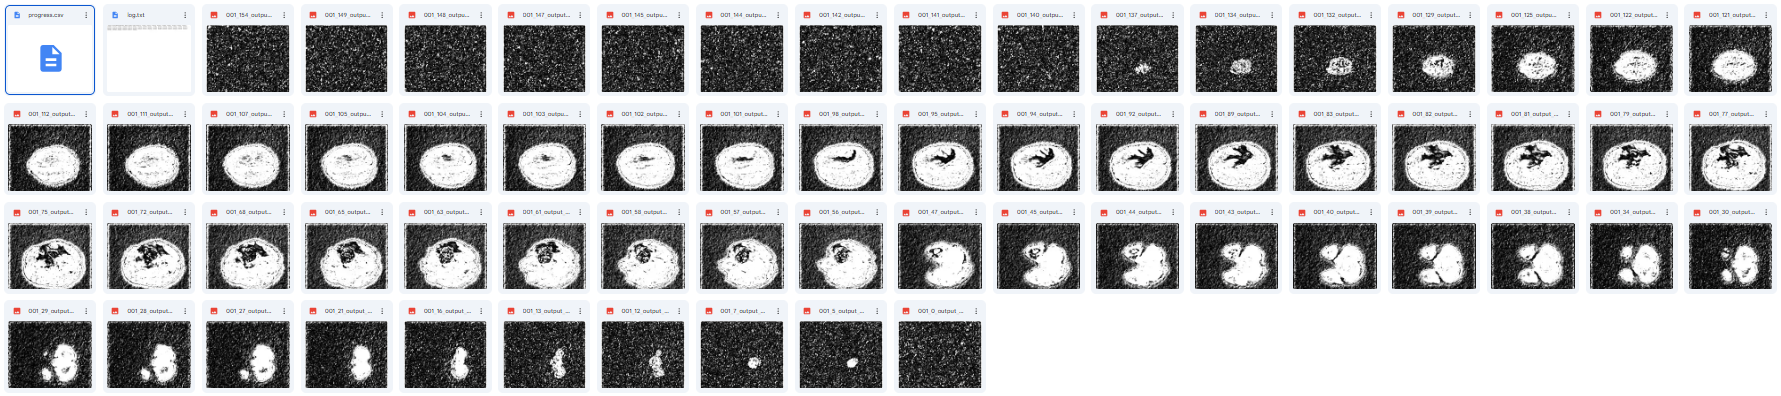

---